In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt

notch_maxd = collections.OrderedDict()
notch_mind = collections.OrderedDict()
notch_avgsd = collections.OrderedDict()
notch_vard = collections.OrderedDict()
notch_stdd = collections.OrderedDict()

In [2]:
def sanitize(gene_str):
	gene_list = gene_str.strip('()')
	gene_list = gene_list.replace('\'', '')
	gene_list = gene_list.replace(' ', '')
	gene_list = gene_list.split(',')
	return gene_list

In [3]:
for i in range(1,32):
    notch = np.genfromtxt("../logs/notch/notch_"+str(i)+"_gene_accuracy.txt",  delimiter='\t',dtype=str)
    b = notch[:,1]
    b = b.astype(np.float32)
    notch[:,1] = b
    notch = notch[np.argsort(notch[:, 1])]
    notch_max = max(b)
    notch_min = min(b)
    notch_avg = np.mean(b)
    notch_std = np.std(b)
    notch_var = np.var(b)
    key = sanitize(notch[0][0])
    notch_maxd.update({str(key):notch_max}) 
    notch_mind.update({str(key):notch_min}) 
    notch_avgsd.update({str(key):notch_avg}) 
    notch_vard.update({str(key):notch_std}) 
    notch_stdd.update({str(key):notch_var})  

In [4]:
#Max/Min/Avg/Var/Std
maxs = notch_maxd.values()
mins = notch_mind.values()
avgs = notch_avgsd.values()
var = notch_vard.values()
stds = notch_stdd.values()

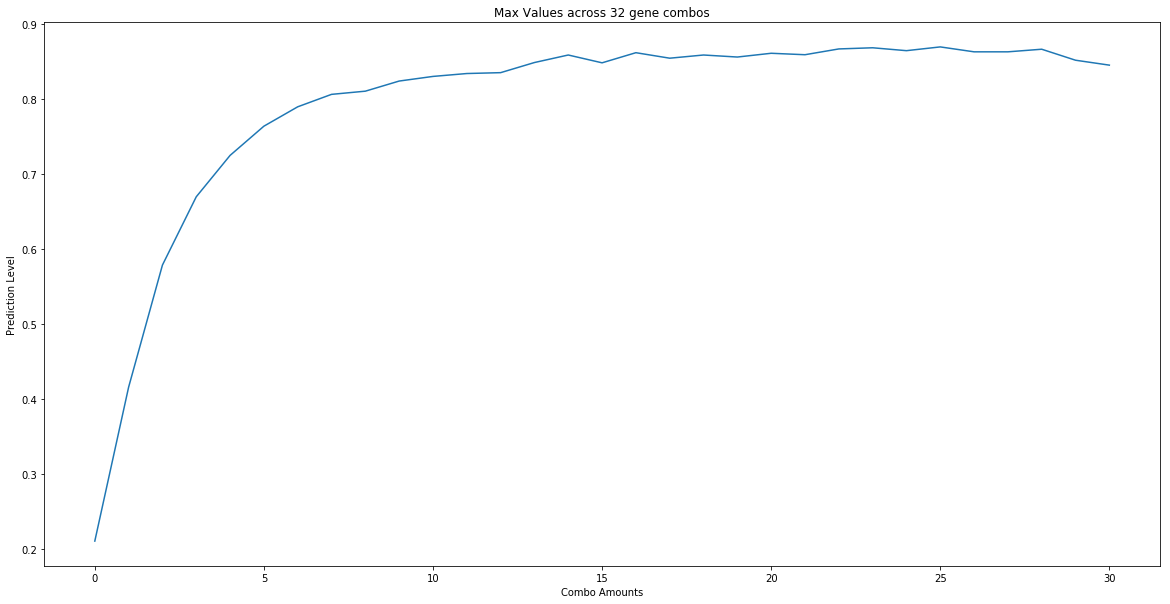

In [5]:
fig = plt.figure(figsize=(20,10))
x = np.arange(len(maxs))
plt.plot(x,maxs)
plt.xlabel('Combo Amounts')
plt.title("Max Values across 32 gene combos")
plt.ylabel("Prediction Level")
plt.show()

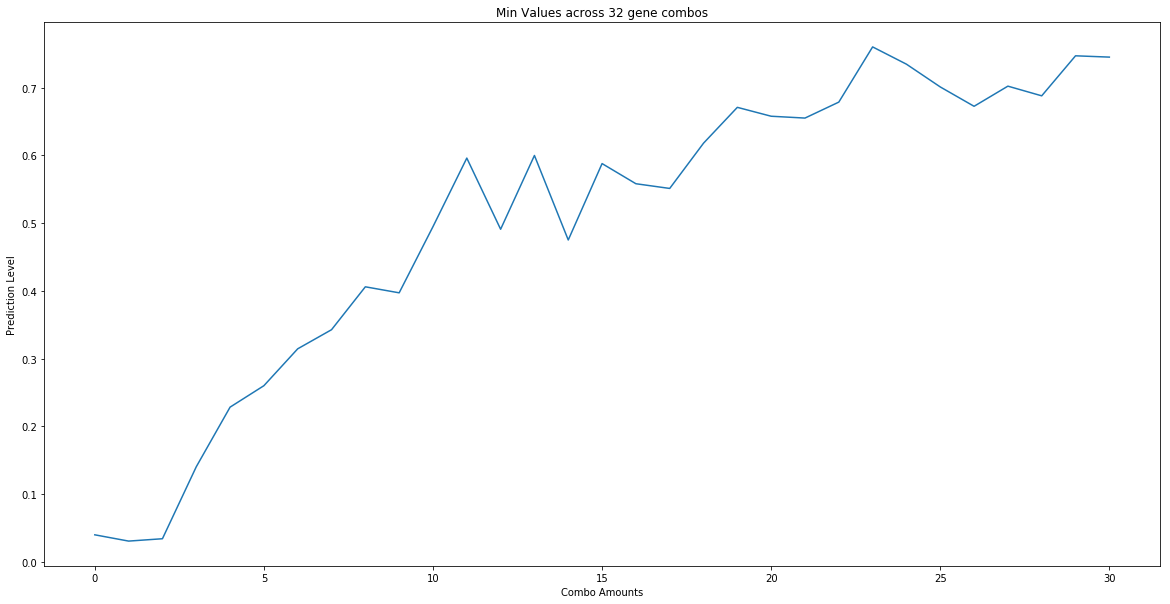

In [6]:
fig = plt.figure(figsize=(20,10))
x = np.arange(len(maxs))
plt.plot(x,mins)
plt.xlabel('Combo Amounts')
plt.title("Min Values across 32 gene combos")
plt.ylabel("Prediction Level")
plt.show()

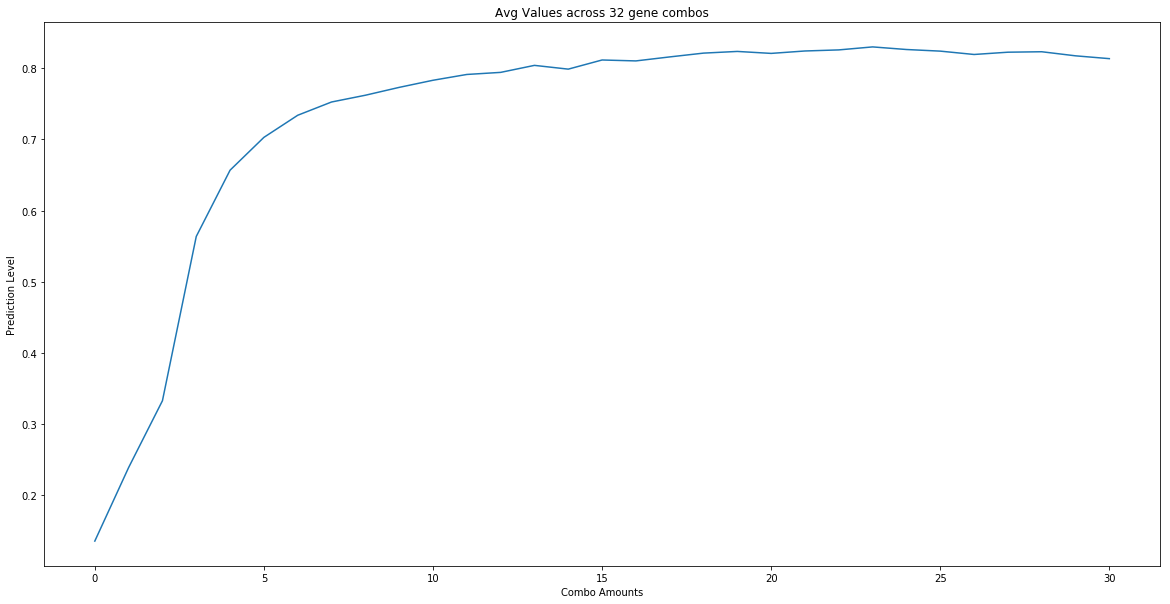

In [7]:
fig = plt.figure(figsize=(20,10))
x = np.arange(len(avgs))
plt.plot(x,avgs)
plt.xlabel('Combo Amounts')
plt.title("Avg Values across 32 gene combos")
plt.ylabel("Prediction Level")
plt.show()

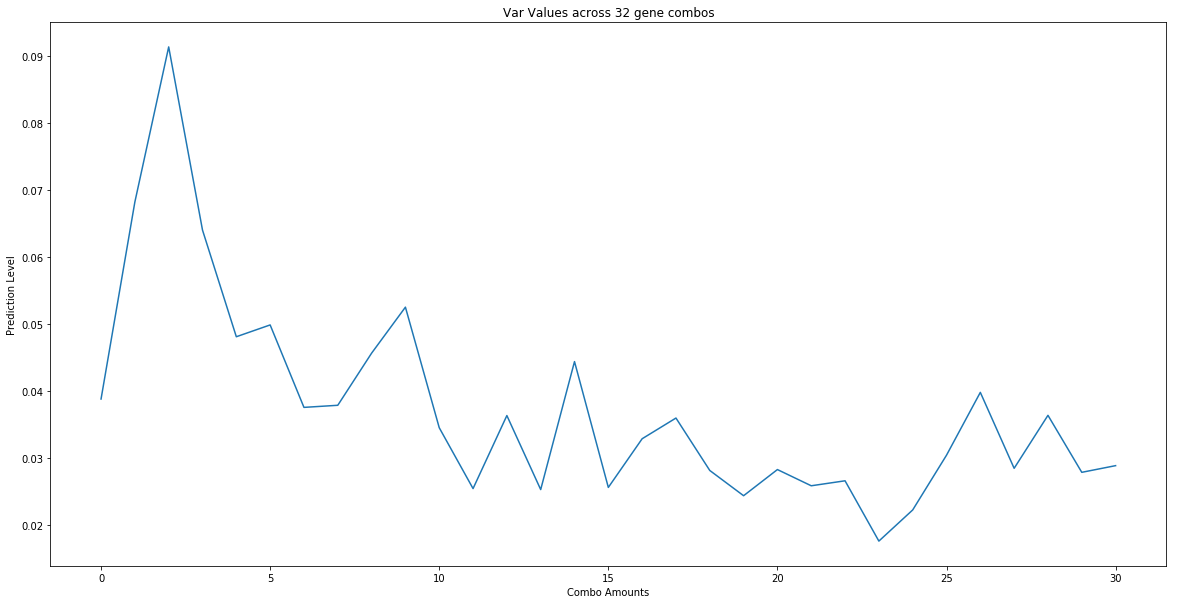

In [8]:
fig = plt.figure(figsize=(20,10))
x = np.arange(len(avgs))
plt.plot(x,var)
plt.xlabel('Combo Amounts')
plt.title("Var Values across 32 gene combos")
plt.ylabel("Prediction Level")
plt.show()

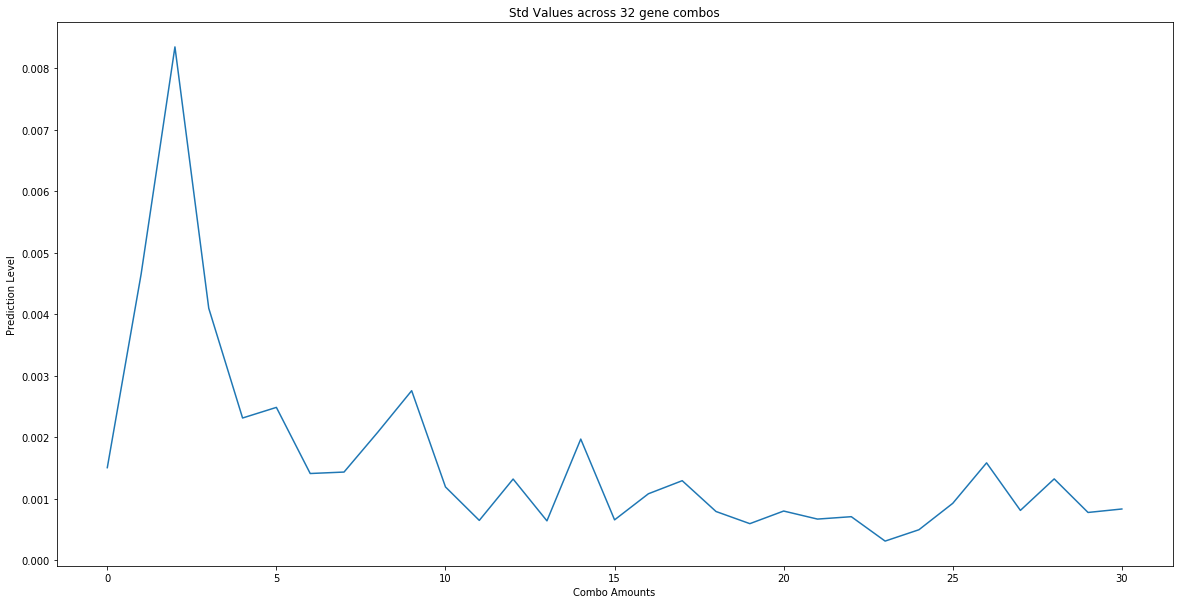

In [9]:
fig = plt.figure(figsize=(20,10))
x = np.arange(len(avgs))
plt.plot(x,stds)
plt.xlabel('Combo Amounts')
plt.title("Std Values across 32 gene combos")
plt.ylabel("Prediction Level")
plt.show()

In [10]:
#get freq of genes in max

In [11]:
gene_freqd ={'JAG1':0, 'FZD1':0, 'PRKCA':0, 'DTX4':0, 'WNT5A':0, 'HEYL':0, 'WNT2':0, 'DTX1':0, 'ST3GAL6':0, 'PPARD':0, 'HES1':0, 'ARRB1':0, 'FZD7':0, 'FZD5':0, 'NOTCH3':0, 'CCND1':0, 'DLL1':0, 'PSEN2':0, 'NOTCH2':0, 'SAP30':0, 'PSENEN':0, 'RBX1':0, 'DTX2':0, 'CUL1':0, 'SKP1':0, 'MAML2':0, 'LFNG':0, 'APH1A':0, 'KAT2A':0, 'TCF7L2':0, 'NOTCH1':0}

In [12]:
for key in notch_maxd.keys():
    key = key.replace("[","");
    key = key.replace("]","");
    key = key.replace("'","");
    key = key.replace(" ","")
    keylist = key.split(",");
    for i in range(len(keylist)):
        if(keylist[i] in gene_freqd.keys()):
            gene_freqd[keylist[i]] = gene_freqd[keylist[i]] + 1

In [13]:
gene_freqd

{'APH1A': 8,
 'ARRB1': 15,
 'CCND1': 12,
 'CUL1': 12,
 'DLL1': 17,
 'DTX1': 27,
 'DTX2': 9,
 'DTX4': 24,
 'FZD1': 26,
 'FZD5': 20,
 'FZD7': 20,
 'HES1': 15,
 'HEYL': 24,
 'JAG1': 26,
 'KAT2A': 4,
 'LFNG': 13,
 'MAML2': 4,
 'NOTCH1': 3,
 'NOTCH2': 12,
 'NOTCH3': 17,
 'PPARD': 11,
 'PRKCA': 27,
 'PSEN2': 13,
 'PSENEN': 11,
 'RBX1': 8,
 'SAP30': 11,
 'SKP1': 10,
 'ST3GAL6': 20,
 'TCF7L2': 31,
 'WNT2': 25,
 'WNT5A': 17}